# Model - 2

Predict the winner using both the data files(matches.csv and deliveries.csv)

In [1]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [2]:
matches_df = pd.read_csv('matches.csv')

In [3]:
matches_df[pd.isnull(matches_df['winner'])]
matches_df['winner'].fillna('Draw', inplace=True)

In [4]:
deliveries_df = pd.read_csv('deliveries.csv')

# In this modal, we are going to restructure the dataframe by adding new column pom_team(Player of match team) in matches_df.


From deliveries_df get the list of batsman along with the team name and match id

In [5]:
teamAndBatsman_df = deliveries_df[['match_id','batting_team','batsman']]

In [6]:
teamAndBatsman_df.head()

match_id         batting_team    batsman
0         1  Sunrisers Hyderabad  DA Warner
1         1  Sunrisers Hyderabad  DA Warner
2         1  Sunrisers Hyderabad  DA Warner
3         1  Sunrisers Hyderabad  DA Warner
4         1  Sunrisers Hyderabad  DA Warner

Drop duplicates rows with the batsman and match id

In [7]:
teamAndBatsman_df = deliveries_df[['match_id','batting_team','batsman']].drop_duplicates(['match_id','batsman'])

In [8]:
teamAndBatsman_df.columns = ['id','team','player']

From deliveries_df get the list of bowler along with the team name and match id

In [9]:
teamAndBowler_df = deliveries_df[['match_id','bowling_team','bowler']].drop_duplicates(['match_id','bowler'])

In [10]:
teamAndBowler_df.columns = ['id','team','player']

Drop duplicates rows with the player and match id

In [11]:
teamBatsmanAndBowler_df = pd.concat([teamAndBatsman_df, teamAndBowler_df]).drop_duplicates(['id','player'])

Now create a new data frame with match id and player of the match

In [12]:
matchIdAndPOM = matches_df[['id','player_of_match']]

In [13]:
matchIdAndPOM.columns = ['id','player']

In [14]:
testDataPOM = pd.merge(teamBatsmanAndBowler_df, matchIdAndPOM, on='id')

In [15]:
testDataPOMUniRow = testDataPOM[testDataPOM['player_x'] == testDataPOM['player_y']]

In [16]:
matchIdAndPomTeam = testDataPOMUniRow.drop(['player_x', 'player_y'], axis=1)

In [17]:
matchIdAndPomTeam.head()

id                         team
3    1          Sunrisers Hyderabad
32   2       Rising Pune Supergiant
48   3        Kolkata Knight Riders
72   4              Kings XI Punjab
86   5  Royal Challengers Bangalore

merge matches_df and matchIdAndPomTeam to create new column for player of the match team name

In [18]:
mergedMatchesFirst_df = pd.merge(matches_df, matchIdAndPomTeam, on=['id'])

In [19]:
mergedMatchesFirst_df.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3                         team  
0     AY Dandekar       NJ Llong      NaN          Sunrisers Hyderabad  
1  A Nand Kishore         S Ravi      NaN       Rising Pune Supergiant  
2     Nitin Menon      CK Nandan      NaN        Kolkata Knight Riders  
3    AK Chaudhary  C Shamshuddin      NaN              Kings XI Punjab  
4             NaN            NaN      NaN  Royal Challengers Bangalore

In [20]:
mergedMatchesFirst_df = mergedMatchesFirst_df.rename(columns={'team': 'pom_team'})

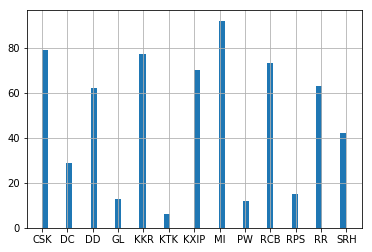

In [21]:
mergedMatchesFirst_df.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiants','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','RPS','KTK','PW'],inplace=True)
mergedMatchesFirst_df.head()
mergedMatchesFirst_df['winner'].hist(bins=50)

In [22]:
mergedMatchesFirstFinal_df = mergedMatchesFirst_df[['team1','team2','toss_decision','toss_winner','venue','result','winner','win_by_runs','win_by_wickets','pom_team']]
mergedMatchesFirstFinal_df.head()

team1 team2 toss_decision toss_winner  \
0   SRH   RCB         field         RCB   
1    MI   RPS         field         RPS   
2    GL   KKR         field         KKR   
3   RPS  KXIP         field        KXIP   
4   RCB    DD           bat         RCB   

                                       venue  result winner  win_by_runs  \
0  Rajiv Gandhi International Stadium, Uppal  normal    SRH           35   
1    Maharashtra Cricket Association Stadium  normal    RPS            0   
2     Saurashtra Cricket Association Stadium  normal    KKR            0   
3                     Holkar Cricket Stadium  normal   KXIP            0   
4                      M Chinnaswamy Stadium  normal    RCB           15   

   win_by_wickets pom_team  
0               0      SRH  
1               7      RPS  
2              10      KKR  
3               6     KXIP  
4               0      RCB

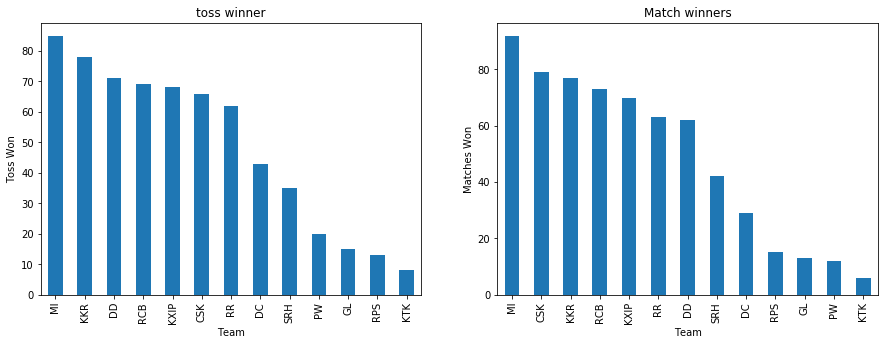

In [29]:
toss_winner = mergedMatchesFirstFinal_df['toss_winner'].value_counts()
winner = mergedMatchesFirstFinal_df['winner'].value_counts()

fig = plt.figure(figsize=(15,5))

A = fig.add_subplot(121)
A.set_xlabel('Team')
A.set_ylabel('Toss Won')
A.set_title("toss winner")
toss_winner.plot(kind = 'bar')

B = fig.add_subplot(122)
B.set_xlabel('Team')
B.set_ylabel('Matches Won')
B.set_title("Match winners")
winner.plot(kind = 'bar') 

# Preprocessing

In [23]:
le = LabelEncoder()
matches_encoded = mergedMatchesFirstFinal_df.apply(le.fit_transform)

In [24]:
matches_encoded.head()
y = matches_encoded['winner']
x = matches_encoded.drop(['winner'], axis=1)
y.head()
x.head()
matches_encoded[matches_encoded['pom_team'] != matches_encoded['winner']].shape
matches_encoded.shape

(633, 10)

In [25]:
ohe = OneHotEncoder()
X_oh = pd.get_dummies(x, columns = x.columns)
X_oh.head()

team1_0  team1_1  team1_2  team1_3  team1_4  team1_5  team1_6  team1_7  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        1   
2        0        0        0        1        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   team1_8  team1_9     ...       pom_team_3  pom_team_4  pom_team_5  \
0        0        0     ...                0           0           0   
1        0        0     ...                0           0           0   
2        0        0     ...                0           1           0   
3        0        0     ...                0           0           0   
4        0        1     ...                0           0           0   

   pom_team_6  pom_team_7  pom_team_8  pom_team_9  pom_team_10  pom_team_11  \
0           0           0           0           0            0            0   
1           0           0           0           0            1            0   
2           0           0           0           0            0            0   
3           1           0           0           0            0            0   
4           0           0           0           1            0            0   

   pom_team_12  
0            1  
1            0  
2            0  
3            0  
4            0  

[5 rows x 188 columns]

# Models based on different algorithms

In [26]:
models = []

models.append(("Logistic Regression:", LogisticRegression()))
models.append(("K-Nearest Neighbour:", KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree Classifier:", DecisionTreeClassifier()))
models.append(("Random Forest Classifier:", RandomForestClassifier(n_estimators=64)))
models.append(("MLP:", MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("GradientBoostingClassifier:", GradientBoostingClassifier()))
models.append(("SVC:", SVC(kernel = 'rbf', random_state = 0)))

print('Models appended...')

Models appended...


In [27]:
def run_models():
    results = []
    names = []
    for name,model in models:
        cv_result = cross_val_score(model, X_oh, y, cv = 10, scoring = "accuracy")
        names.append(name)
        results.append(cv_result)
    for i in range(len(names)):
        print(names[i],results[i].mean()*100)

# Result for Model2

In [101]:
run_models()

C:\Users\prastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\prastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\prastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
C:\Users\prastiwari\AppData\Local\Continuum\anaconda3\lib\site-packages\skle

Logistic Regression: 97.6492358834
K-Nearest Neighbour: 91.0716876533
Decision Tree Classifier: 95.8173638656
Random Forest Classifier: 98.1233316801
MLP: 97.4923443878
GradientBoostingClassifier: 97.0205012301
SVC: 84.9874217133
